In [80]:
# import
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

## Defining functions

In [55]:
def expScheme(dx, dt, L, time):
    alpha = dt/dx**2
    
    Nx = int(L / dx)
    Nt = int(time / dt)
    
    x = np.linspace(0, L, Nx)
    t = np.linspace(0, time, Nt)
    U = np.zeros((Nx, Nt)) # Holds values at all time steps
    U[:, 0] = np.sin(np.pi * x) # Initial conditions
 
    for j in range(Nt-1): # tid
        for i in range(1, Nx-1): # sted
            U[i, j+1] = alpha*U[i-1, j] + (1 - 2 * alpha) * U[i, j] + alpha * U[i+1, j]
    return x, t, U

In [81]:
def analsol(dx, dt, L, time):
    alpha = dt/dx**2
    
    Nx = int(L / dx)
    Nt = int(time / dt)
    
    x = np.linspace(0, L, Nx)
    t = np.linspace(0, time, Nt)
    U = np.zeros((Nx, Nt)) # Holds values at all time steps
    U[:, 0] = np.sin(np.pi * x) # Initial conditions
 
    for j in range(Nt-1): # tid
        for i in range(1, Nx-1): # sted
            U[i,j+1] = np.exp(-np.pi**2*t[j+1])*np.sin(np.pi*x[i])
    return x, t, U

## Plotting results

### 2D

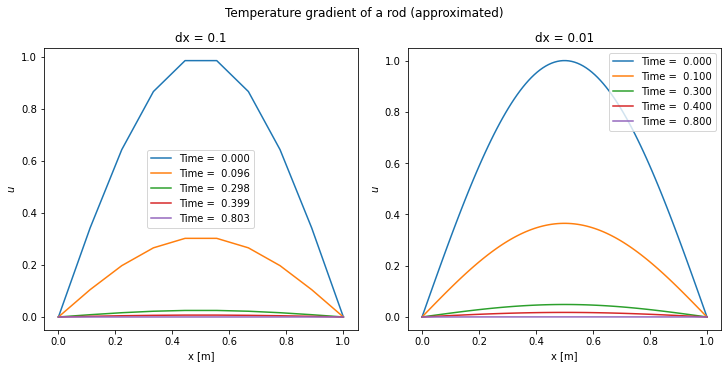

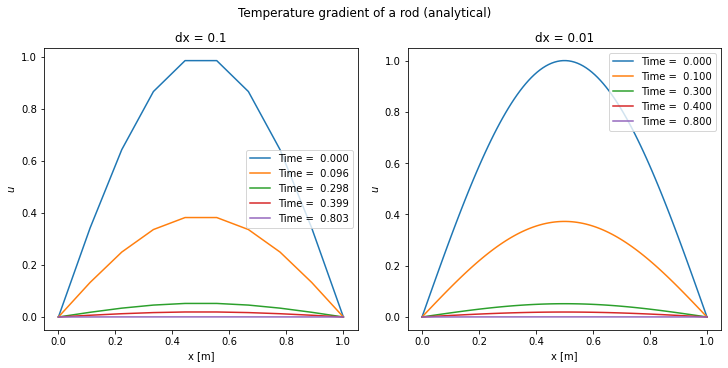

In [82]:
"""2D-plot av expScheme"""
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize = (10,5))
fig.suptitle('Temperature gradient of a rod (approximated)')

for i, dx in enumerate([0.1,0.01]):
    
    dt = dx**2 * 0.5
    L = 1
    time = 1
    x, t, u = expScheme(dx, dt, L, time)

    axs[i].set_title(f'dx = {dx}')
    for t_i in [0, int(len(t) * 0.1), int(len(t) * 0.3), int(len(t) * 0.4), int(len(t) * 0.8)]:
        axs[i].plot(x, u[:, t_i], label = f'Time =  {t[t_i]:0.3f}')
    axs[i].set_xlabel('x [m]')
    axs[i].set_ylabel('$u$ ')
    axs[i].legend()
    
"""2D-plot av analsolve"""
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize = (10,5))
fig.suptitle('Temperature gradient of a rod (analytical)')

for i, dx in enumerate([0.1,0.01]):
    
    dt = dx**2 * 0.5
    L = 1
    time = 1
    x, t, u = analsol(dx, dt, L, time)

    axs[i].set_title(f'dx = {dx}')
    for t_i in [0, int(len(t) * 0.1), int(len(t) * 0.3), int(len(t) * 0.4), int(len(t) * 0.8)]:
        axs[i].plot(x, u[:, t_i], label = f'Time =  {t[t_i]:0.3f}')
    axs[i].set_xlabel('x [m]')
    axs[i].set_ylabel('$u$ ')
    axs[i].legend()


### 3D

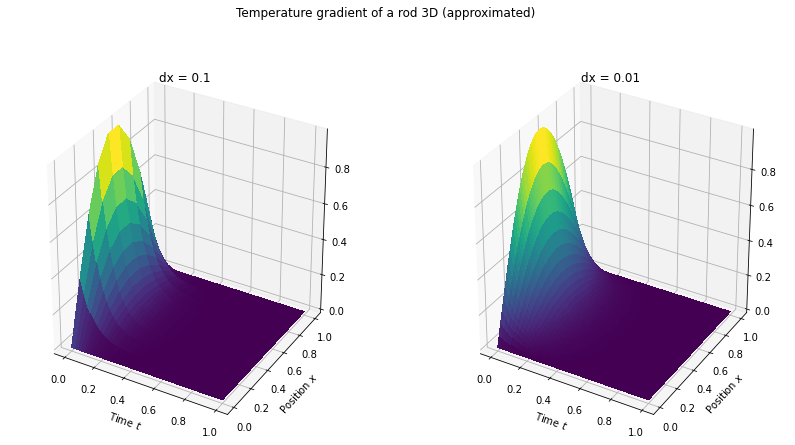

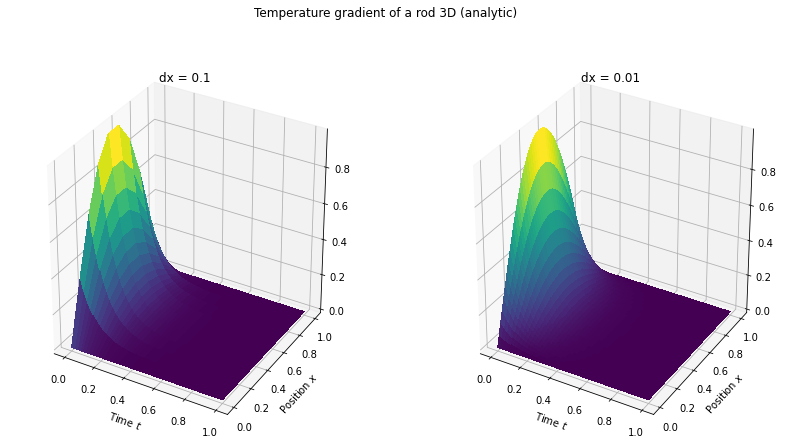

In [84]:
"""3D-plot av expscheme"""
fig = plt.figure(figsize=(14,7))
fig.suptitle('Temperature gradient of a rod 3D (approximated)')

for i, dx in enumerate([0.1,0.01]):
    
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    dt = dx**2 * 0.5
    L = 1
    time = 1
    x, t, u = expScheme(dx, dt, L, time)
    T, X = np.meshgrid(t, x)
    ax.set_title(f'dx = {dx}')
    ax.plot_surface(T, X, u, linewidth=0, antialiased=False, cmap=cm.viridis)
    ax.set_xlabel('Time $t$')
    ax.set_ylabel('Position $x$')
    
"""3D-plot av analsol hihi"""
fig = plt.figure(figsize=(14,7))
fig.suptitle('Temperature gradient of a rod 3D (analytic)')

for i, dx in enumerate([0.1,0.01]):
    
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    dt = dx**2 * 0.5
    L = 1
    time = 1
    x, t, u = analsol(dx, dt, L, time)
    T, X = np.meshgrid(t, x)
    ax.set_title(f'dx = {dx}')
    ax.plot_surface(T, X, u, linewidth=0, antialiased=False, cmap=cm.viridis)
    ax.set_xlabel('Time $t$')
    ax.set_ylabel('Position $x$')

## Measuring the error

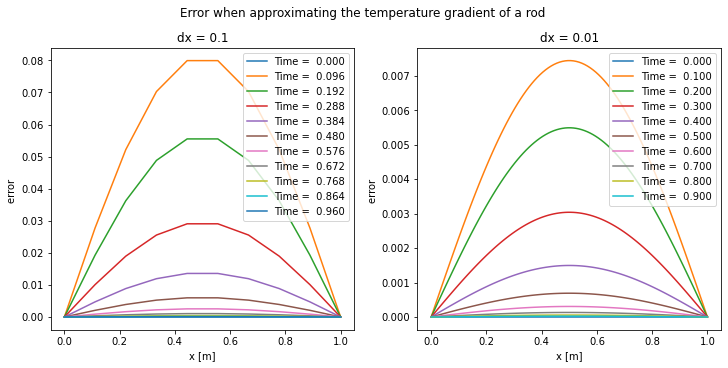

In [88]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize = (10,5))
fig.suptitle('Error when approximating the temperature gradient of a rod ')

for i, dx in enumerate([0.1,0.01]):

    dt = dx**2 * 0.5
    L = 1
    time = 1
    x, t, u_an = analsol(dx, dt, L, time)
    x, t, u_ap = expScheme(dx, dt, L, time)
    
    axs[i].set_title(f'dx = {dx}')
    for t_i in range(0, int(len(t)),int(len(t) * 0.1)):
        axs[i].plot(x, abs(u_an[:, t_i]-u_ap[:, t_i]), label = f'Time =  {t[t_i]:0.3f}')
    axs[i].set_xlabel('x [m]')
    axs[i].set_ylabel('error ')
    axs[i].legend()